# 因子分析Demo

In [1]:
from metrics import * 
import pandas as pd
from shrp_calmar import * 
import numpy as np
from scipy import stats
import warnings 
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
from RETURNANALYSIS import *

In [3]:
data_bspcr=pd.read_csv(r"C:/Users/11604/Desktop/work/pcr衍生因子.csv" ,index_col='timee')
factor = data_bspcr.iloc[:,[3,4,5,6,7,8,20]]
# 准备好因子和收益率的数据，

In [4]:
corr1 = F_retAn(factor)

In [5]:
corr1.correlation()

,VPCR,R5VPCR,R5OPCR,R5APCR,RETURNLAG
VPCR,1.000000,0.568447,0.042093,0.355393,-0.007271
R5VPCR,0.568447,1.000000,0.136192,0.633302,-0.000096
R5OPCR,0.042093,0.136192,1.000000,0.487962,0.000456
R5APCR,0.355393,0.633302,0.487962,1.000000,-0.003200
RETURNLAG,-0.007271,-0.000096,0.000456,-0.003200,1.000000


In [6]:
corr1.LinearRegres(factor.VPCR.values, factor.RETURNLAG.values)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                     nan
Model:                            OLS   Adj. R-squared (uncentered):                nan
Method:                 Least Squares   F-statistic:                                nan
Date:                Fri, 08 Jul 2022   Prob (F-statistic):                         nan
Time:                        08:46:29   Log-Likelihood:                             nan
No. Observations:               54965   AIC:                                        nan
Df Residuals:                   54964   BIC:                                        nan
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1                nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 穷举法Kmeans Demo      

In [7]:
from metrics import * 
import pandas as pd
from shrp_calmar import * 
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [8]:
from LOOPFORBESTANDKMEANS import *
from BTtools import *

#### 穷举法生成各参数组合

In [9]:
#数据准备
PCR_DE = pd.read_csv('C:/Users/11604/Desktop/work/pcr衍生因子1.csv')
PCR_DE.set_index(["timee"], inplace=True)
factor2=PCR_DE.copy()
factor2['index']=range(len(factor2))
factor2=factor2.loc[factor2['index']>=factor2.loc['2021/7/30 14:56']['index']]
factor2=factor2.drop(columns=['index'])
#选取7-30之前的数据，

In [10]:
# rolling 20
falist1=['APCR', 'OPCR']
movlenrange = list(range(10,20,5))
thresrange = np.arange(1,1.6,0.5)
freqrange = range(2,4,1)
时间列名 = 'timee'
收益率列名='FUTURE20RELAG'

In [11]:
loopforbest(factor2,falist1,thresrange,movlenrange,freqrange,时间列名,收益率列名)

,annual_return,sharpe_ratio,calmar_ratio,max_drawdown,bps_margin,hold_period,IC,signaltime,threshold,movinglength,Factorname,steps
0,1.895,13.702,102.354,0.019,2.889,1.239,NaN,3097.0,1.0,10.0,APCR,2
1,2.555,14.754,183.726,0.014,4.163,1.252,NaN,2930.0,1.0,15.0,APCR,2
2,0.776,7.304,41.903,0.019,2.526,1.132,NaN,1325.0,1.5,10.0,APCR,2
3,1.033,10.351,65.680,0.016,3.547,1.138,NaN,1263.0,1.5,15.0,APCR,2
4,-11.172,-21.548,-2.624,4.258,-32.616,5.517,-0.012,7203.0,1.0,10.0,OPCR,2
5,-10.479,-20.019,-2.624,3.994,-41.453,7.636,-0.012,7357.0,1.0,15.0,OPCR,2
6,-6.621,-21.671,-2.624,2.524,-19.125,2.686,-0.012,3544.0,1.5,10.0,OPCR,2
7,-8.154,-21.567,-2.624,3.108,-30.938,4.108,-0.012,4126.0,1.5,15.0,OPCR,2
8,2.017,13.702,204.078,0.010,4.504,1.240,NaN,2116.0,1.0,10.0,APCR,3
9,2.099,13.648,319.666,0.007,5.018,1.269,NaN,2023.0,1.0,15.0,APCR,3


#### Kmeans 把不同类型的参数组合选出

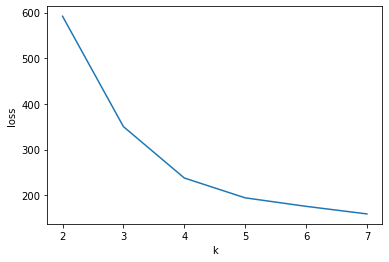

[591.9420007064804, 350.2423883233581, 237.67651149153986, 194.2300586169636, 175.62132168667557, 159.01199315261104]


[591.9420007064804,
 350.2423883233581,
 237.67651149153986,
 194.2300586169636,
 175.62132168667557,
 159.01199315261104]

In [12]:
# Kmeans 肘部法则选出拟定族群数，开始衰减点是确定数字
# 路径是从穷举法产生的大量参数组合的数据的目录
get_groupnumber(range(2,8),r"C:/Users/11604/Desktop/work/summary51.csv")

In [13]:
Km_Optm(5, r"C:/Users/11604/Desktop/work/summary51.csv")

,index,Unnamed: 0,annual_return,sharpe_ratio,calmar_ratio,max_drawdown,bps_margin,hold_period,IC,signaltimes,threshold,movinglength,??????,0
0,0,225,0.657,2.409,6.048,0.109,0.951,5.083,-0.005,19700,1.0,10,oi_pcr,4
1,1,226,0.652,2.548,5.480,0.119,1.221,6.305,-0.005,18905,1.0,15,oi_pcr,4
2,2,227,0.527,2.155,4.175,0.126,1.150,6.993,-0.005,17997,1.0,20,oi_pcr,4
3,3,228,0.494,2.090,4.382,0.113,1.203,7.389,-0.005,17051,1.0,25,oi_pcr,4
4,4,229,0.346,1.594,3.087,0.112,0.912,7.595,-0.005,16165,1.0,30,oi_pcr,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609,4719,5169,0.009,1.659,2.607,0.004,1.024,1.000,-0.004,52,5.0,180,td_pcr_diff,0
2610,4721,5171,0.004,0.745,1.187,0.004,0.558,1.000,-0.004,45,5.0,240,td_pcr_diff,0
2611,4722,5172,0.007,1.101,2.051,0.003,0.822,1.000,-0.004,46,5.0,270,td_pcr_diff,0
2612,4723,5173,0.008,1.236,2.533,0.003,0.942,1.000,-0.004,47,5.0,300,td_pcr_diff,0


# 遗传算法 demo

In [14]:
from metrics import * 
import pandas as pd
from shrp_calmar import * 
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from GetFactors import *
from BTtools import *

In [15]:
from GENETICALGO import *

In [16]:
# 因子准备
PCR_DE = pd.read_csv('C:/Users/11604/Desktop/work/pcr衍生因子1.csv')
PCR_DE.set_index(["timee"], inplace=True)
factor3=PCR_DE.copy()
factor3['index']=range(len(factor3))
factor3=factor3.loc[factor3['index']<=factor3.loc['2021/7/30 14:56']['index']]
factor3=factor3.drop(columns=['index'])
A = list(range(0,len(factor3),11))
factor2 = factor3.reset_index().iloc[A].set_index('timee')

In [17]:
ga = ga_opt(6,factor2['R20IVPCR'],factor2.RETURNLAG.values,0.4,0.08,0,0,0,20)
#由于这个只是demo，为了节省时间，只设置了迭代20次，pool中只有6个基因，可根据需要改变

In [18]:
ga.result()
# 如结果所示这里现实的参数就是迭代20次结束后最好的结果

100%|██████████| 20/20 [00:29<00:00,  1.46s/it]

The optimal solution finally is 5.645173741393031e-05
x = 2.40000, y = 120.00000 


# GetFactors Demo

In [19]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pathlib import Path
import os

In [20]:
from GetFactors import *
from BTtools import *

In [21]:
# data准备
data_y=pd.read_csv(r"C:/Users/11604/Desktop/work/data1.csv")
data_y = data_y.set_index('time')
data_y = data_y.head(10000)
index = data_y.index

In [22]:
data = ready_GetF(data_y,index)

In [23]:
data.TD_PCR('time')
data.TDivrgence('time')
data.CP_skew('time')
data.OI_PCR('time')
data.allkindsPCR()
data.ATMAPCR(3)

,ATMAPCR,ATMR5APCR,ATMR20APCR
timee,,,
2021/1/4 10:00,131.034091,NaN,NaN
2021/1/4 10:01,0.000000,NaN,NaN
2021/1/4 10:02,116.526316,NaN,NaN
2021/1/4 10:03,0.000000,NaN,NaN
2021/1/4 10:04,0.000000,77.963255,NaN
...,...,...,...
2021/1/4 9:55,45.614035,36.971530,61.100120
2021/1/4 9:56,109.519713,86.646948,66.770145
2021/1/4 9:57,64.760204,94.374016,68.124838


In [24]:
datapath = 'C:/Users/11604/Desktop/work/'

In [25]:
newfilelist =[x.name for x in Path(datapath).iterdir() if x.is_dir()] 
newfilelist

['.ipynb_checkpoints', 'summary class func', 'wdf', '__pycache__']